# **Convolution Usage**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten


## **Convolutions**

In [2]:
array = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
kernel = np.array([1, -1, 0])
conv = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
for ii in range(8):
    conv[ii] = (kernel * array[ii:ii+3]).sum()

print(conv)

[ 1 -1  1 -1  1 -1  1 -1  0  0]


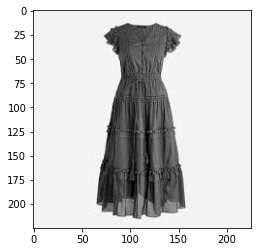

In [4]:
image = plt.imread('dress.jpg')
image = color.rgb2gray(image)
plt.imshow(image, cmap="gray")  
plt.show()

imshow(), by default, uses a kind of heatmap (called viridis) to display the image intensities. So we should specify the grayscale colormap while displaying an image.

In [5]:
kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
result = np.zeros(image.shape)

# Output array
for ii in range(image.shape[0] - 3):
    for jj in range(image.shape[1] - 3):
        result[ii, jj] = (image[ii:ii+3, jj:jj+3] * kernel).sum()

# Print result
print(result)

[[4.76187843 4.76187843 4.76187843 ... 0.         0.         0.        ]
 [4.76187843 4.76187843 4.76187843 ... 0.         0.         0.        ]
 [4.76187843 4.76187843 4.76187843 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


* To be able to finding a particular feature, we should define different 
kernels. Here are some examples of kernels used for various purposes:

**1. Horizontal lines in images:**





In [6]:
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1, -1]])

**2. Light spot surrounded by dark pixels:**

In [7]:
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

**3. Dark spot surrounded by bright pixels:**

In [8]:
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])

## **Implementing image convolutions in Keras**

In [9]:
model = Sequential()


Initializing the model object.

In [10]:
model.add(Conv2D(10, kernel_size=3, activation='relu', 
               input_shape=(225, 225,  1)))

Adding a convolutional layer.

In [11]:
model.add(Flatten())

Flattening the output of the convolutional layer.

In [12]:
model.add(Dense(3, activation='softmax'))

Adding an output layer for the 3 categories.

In [13]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


Compiling the model.

In [ ]:
model.fit(train_data, train_labels, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

Fitting the model on a training set.

In [ ]:
model.evaluate(test_data, test_labels, batch_size=10)

Evaluating the model on separate test data.

## **Tweaking your convolutions**

### **Add padding to a CNN**
Padding allows a convolutional layer to retain the resolution of the input into this layer. This is done by adding zeros around the edges of the input image, so that the convolution kernel can overlap with the pixels on the edge of the image.

In [ ]:
model = Sequential()

model.add(Conv2D(10, kernel_size=3, activation='relu', 
                 input_shape=(225, 225, 1), 
                 padding = 'same'))  # by default padding = 'valid'

model.add(Flatten())
model.add(Dense(3, activation='softmax'))

### **Add strides to a convolutional network**
The size of the strides of the convolution kernel determines whether the kernel will skip over some of the pixels as it slides along the image. This affects the size of the output because when strides are larger than one, the kernel will be centered on only some of the pixels.

In [ ]:
model.add(Conv2D(10, kernel_size=3, activation='relu', 
              input_shape=(225, 225, 1), 
              strides = 2))     # by default strides = 1

### **Calculation the size of convolutional layer output**

O = (( I - K + 2P ) / S ) + 1

* I = size of the input
* K = size of the kernels
* P = size of the zero padding
* S = strides

For example the size of the output for an input of size 28 by 28, with a kernel of size 6 by 6, padding of 1 and strides of 2,

Output Size = ( ( 28 - 6 + 2 ) / 2 ) + 1 = 13